# COP508 Machine Learning CW

Table of Contents:

## Data Ingestion

### Importing the libraries

In [1]:
import os
import numpy as np
import pickle
import requests
import matplotlib.pyplot as plt
import cv2
import wget
from skimage.util import random_noise
from matplotlib import image
from scipy import ndimage

### Importing the dataset from local machine

In [2]:
path_to_check = os.path.join('', 'image_recognition_dataset.pth')
data_path = path_to_check
def load_coursework_data():
    if not os.path.exists(path_to_check):
        print("Cannot find the dataset on local !")
        print("Downloading the dataset from cloud, it may take several mintues.")
        url = 'https://www.dropbox.com/s/j05hyf667ikzu4s/image_recognition_dataset.pth?dl=1'
        filename = wget.download(url)
        data_path = os.path.join('', filename)
    else:
        print("Data founded on local {:s}".format(path_to_check))
        data_path = path_to_check
        
    data = pickle.load(open(data_path, 'rb'))
    train_imgs,train_labels,test_imgs,test_labels = data.values()
    return train_imgs,train_labels,test_imgs,test_labels

### Splitting the dataset into the Training & Test set

In [3]:
train_imgs,train_labels,test_imgs,test_labels = load_coursework_data()

Data founded on local image_recognition_dataset.pth


### Displaying dataset information 

In [4]:
cls_train = len(np.unique(train_labels))
print("Total number of image classes : {:d}".format(cls_train))
print("Shape of training set", train_imgs.shape)

print("Training image count: ", train_imgs.shape[0])
print("Test image count: ", test_imgs.shape[0])

Total number of image classes : 8
Shape of training set (40000, 32, 32, 3)
Training image count:  40000
Test image count:  8000


### Visualising five images from the dataset

In [5]:
def plot_trained_images() => None:
    for i in range(8):
        plt.subplot(1, 8, i+1)
        imgData = np.array(train_imgs[i])
        plt.title(train_labels[i])
        plt.imshow(imgData)
        plt.axis('off')
plot_trained_images()

SyntaxError: invalid syntax (1840133969.py, line 1)

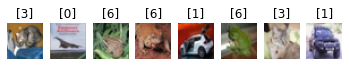

In [ ]:
def plot_test_images() => None:
    for i in range(8):
        plt.subplot(1, 8, i+1)
        imgData = np.array(test_imgs[i])
        plt.title(test_labels[i])
        plt.imshow(imgData)
        plt.axis('off')
plot_test_images()

## Data Preprocessing

### Gray scale conversion

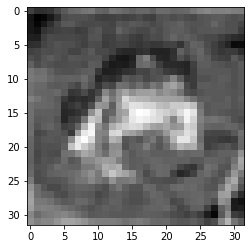

In [ ]:
# All images are converted from colour to grayscale.
grayscale_train_img = [cv2.cvtColor(one_img, cv2.COLOR_BGR2GRAY) for one_img in train_imgs]
grayscale_test_img = [cv2.cvtColor(one_img, cv2.COLOR_BGR2GRAY) for one_img in test_imgs]

# Verify if images are converted properly.
plt.imshow(grayscale_train_img[0], cmap='gray')

### Normalization

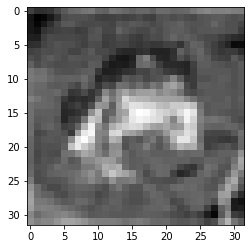

In [ ]:
normalized_train_img = [one_img/255.0 for one_img in grayscale_train_img]
normalized_test_img =  [one_img/255.0 for one_img in grayscale_test_img]
plt.imshow(normalized_train_img[0], cmap='gray')

### Gaussian Blur

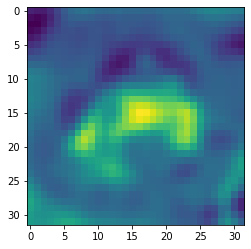

In [ ]:
train_blurred_img = [ndimage.gaussian_filter(train_blur_imgs, sigma= 1) for train_blur_imgs in normalized_train_img]
test_blurred_img = [ndimage.gaussian_filter(test_blur_imgs, sigma= 1) for test_blur_imgs in normalized_test_img]
plt.imshow(train_blurred_img[0])

### Rotation

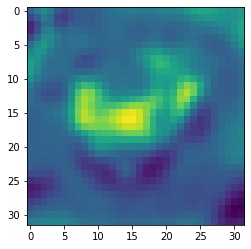

In [ ]:
rotated_train_img = [ndimage.rotate(train_rotate_imgs, angle=180) for train_rotate_imgs in train_blurred_img]
rotated_test_img = [ndimage.rotate(test_rotate_imgs, angle=180) for test_rotate_imgs in test_blurred_img]
plt.imshow(rotated_train_img[0])

## Model Selection

## Model Evaluation

## Model Launch/Prediction